### Imports:



In [43]:
import seaborn as sns
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
churndf = pd.read_csv("Churn_Modelling.csv")

### Customer Churn Info:



In [158]:
churndf.head()# Made it show first 5 data lines

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [159]:
churndf.tail()# Made it show last 5 data lines

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
19995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
19996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
19997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
19998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
19999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [50]:
# Columns Removed: ROW NUM, Customer ID, Surname
columns_to_drop = ["RowNumber", "CustomerId", "Surname"]
churndf.drop(columns_to_drop, axis=1, inplace=True)

In [51]:
churndf.info() #Made it show info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      20000 non-null  int64  
 1   Geography        20000 non-null  object 
 2   Gender           20000 non-null  object 
 3   Age              20000 non-null  int64  
 4   Tenure           20000 non-null  int64  
 5   Balance          20000 non-null  float64
 6   NumOfProducts    20000 non-null  int64  
 7   HasCrCard        20000 non-null  int64  
 8   IsActiveMember   20000 non-null  int64  
 9   EstimatedSalary  20000 non-null  float64
 10  Exited           20000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.7+ MB


In [52]:
churndf.columns# Made it show all colums

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [53]:
churndf['Exited'].value_counts(normalize = True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

### `EDA`



##### _Heatmap for Customer Churn_



Text(0.5, 1.0, 'Customer Churn Heatmap')

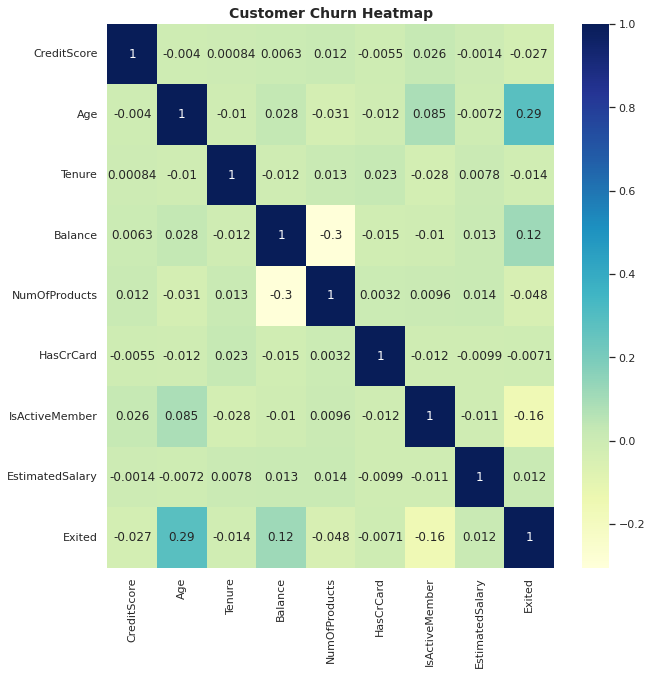

In [152]:
#Our first heatmap
corr = churndf.corr()
plt.figure(figsize=(10,10))# Applied size
sns.heatmap(churndf.corr(), cmap='YlGnBu', annot = True).set_title('Customer Churn Heatmap',fontdict= { 'fontsize': 14, 'fontweight':'bold'})# Set it to be a heatmap and edited it to represent our data

##### _Data for Customers by Geography_

Countries include France, Spain, Germany.



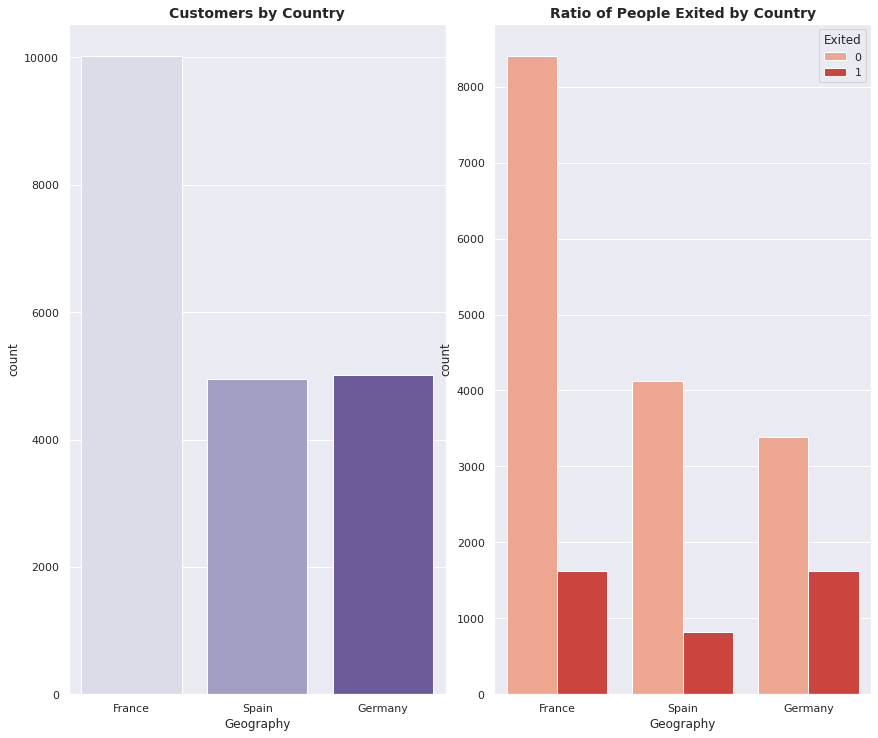

In [156]:
#Countries
fig, axis = plt.subplots(1,2)# Made it have two fields for plots
fig.tight_layout()

# Customer by Country
# First plot
sns.countplot(x='Geography', ax=axis[0], data=churndf, palette = 'Purples').set_title('Customers by Country',fontdict= { 'fontsize': 14, 'fontweight':'bold'}) # Named the plot and X-value

# Geograhy to Exited
# Second plot
sns.countplot(x="Geography", hue="Exited", ax=axis[1], data=churndf, palette = 'Reds').set_title('Ratio of People Exited by Country',fontdict= { 'fontsize': 14, 'fontweight':'bold'})# Named the plot and X-value, Y(hue)-Value
sns.set_theme(style="darkgrid")# Set a stile for plots

##### _Number of People Exited by Gender, Age, Balance, Tenure, and Average Salary._



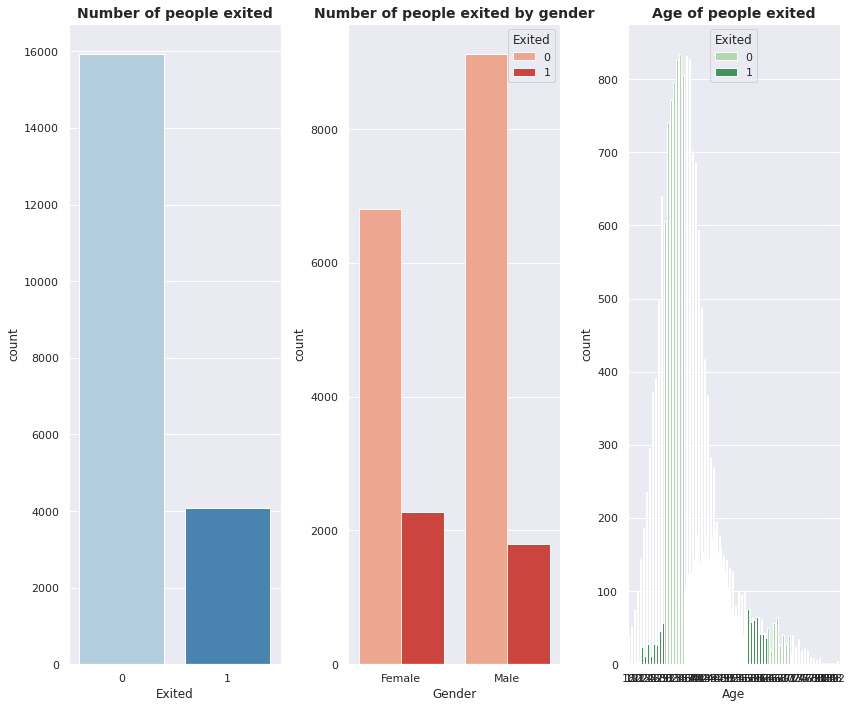

In [157]:
# Everything and Exited
fig, axis = plt.subplots(1,3) # Made it have three fields for plots
sns.set({'figure.figsize':(12,10)}); # Set the size

# Number Exited
# First plot
sns.countplot(x="Exited", ax=axis[0], data=churndf, palette = 'Blues').set_title('Number of people exited',fontdict= { 'fontsize': 14, 'fontweight':'bold'})

# Gender to Exit
# Second plot
sns.countplot(x="Gender", hue = "Exited", ax=axis[1], data=churndf, palette = 'Reds').set_title('Number of people exited by gender',fontdict= { 'fontsize': 14, 'fontweight':'bold'})

# Exit to Age
# Third plot
sns.countplot(data = churndf , x = 'Age', hue = 'Exited', ax=axis[2], palette = 'Greens').set_title('Age of people exited',fontdict= { 'fontsize': 14, 'fontweight':'bold'})
sns.set_theme(style="darkgrid")
fig.tight_layout()

Text(0.5, 1.0, 'Salary of people exited')

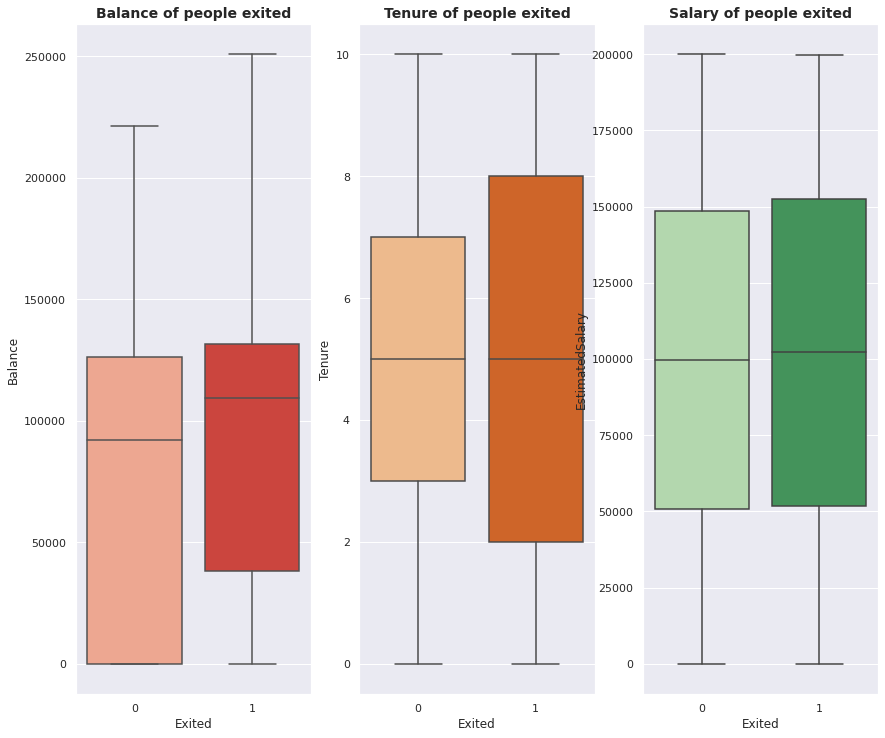

In [160]:
# Exited Continued
fig, axis = plt.subplots(1,3)#Made it have three fields for plots
fig.tight_layout()
sns.set({'figure.figsize':(13,10)});#Made exact size

# Exit to Balance
#First plot
sns.boxplot(data=churndf, x='Exited', y='Balance', ax=axis[0], palette = 'Reds').set_title('Balance of people exited',fontdict= { 'fontsize': 14, 'fontweight':'bold'})

# Exit To Tenure
#Second Plot
sns.boxplot(data=churndf, x='Exited', y='Tenure', ax=axis[1], palette = 'Oranges').set_title('Tenure of people exited',fontdict= { 'fontsize': 14, 'fontweight':'bold'})

# Exit to Salary
#Third plot
sns.boxplot(data=churndf, x='Exited', y='EstimatedSalary', ax=axis[2], palette = 'Greens').set_title('Salary of people exited',fontdict= {'fontsize': 14, 'fontweight':'bold'})

##### _Scatterplot showing the relation between Exited/Non\-exited, Age, and Balance._

We made our Grouped plot, which was very hard



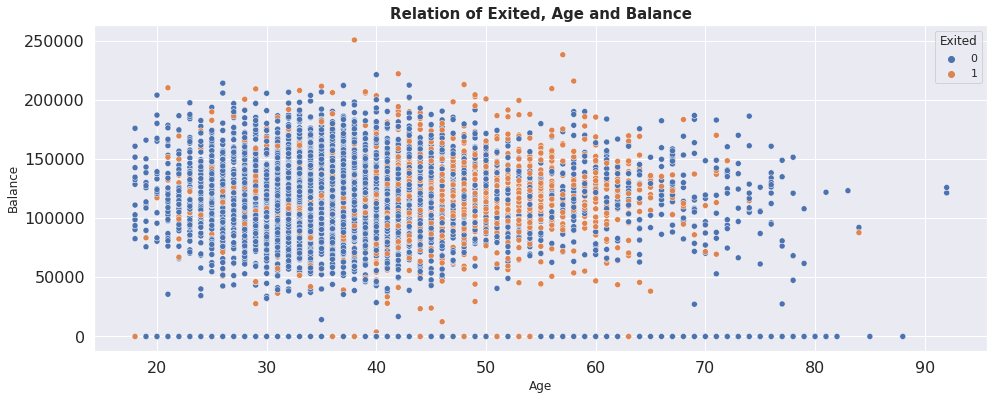

In [122]:
sns.scatterplot(x="Age", y="Balance", hue='Exited', data=churndf)#Importing three variables
plt.title('Relation of Exited, Age and Balance', fontsize=15, fontweight='bold')#Named and colored the plot
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### Exited vs. Non\-exited in terms of number of products

Here, we wanted to show some statistics about the number of products.



Text(0.5, 1.0, 'Amount of people exited in terms of number of products')

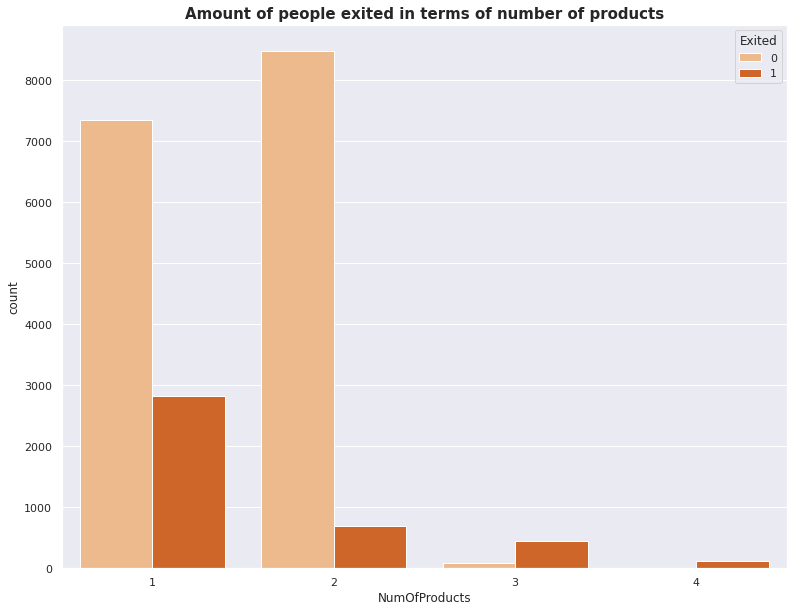

In [134]:

fig.tight_layout()
sns.countplot(data=churndf, x='NumOfProducts', hue='Exited', palette = 'Oranges')#Pretty common script
plt.title('Amount of people exited in terms of number of products', fontsize=15, fontweight='bold')#made a heading and colored the plot


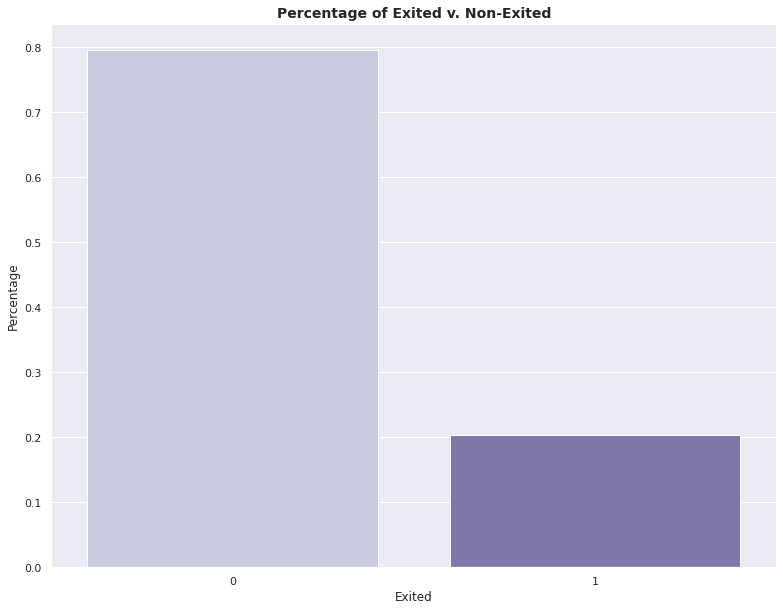

In [145]:
# Percentage of exited and non-exited5
eda_percentage = churndf['Exited'].value_counts(normalize = True).rename_axis('Exited').reset_index(name = 'Percentage') #made it count the percentage of exit v. non-exit
ax = sns.barplot(x = 'Exited', y = 'Percentage', data = eda_percentage, palette = 'Purples').set_title('Percentage of Exited v. Non-Exited',fontdict= {'fontsize': 14, 'fontweight':'bold'}) #X,Y parametrs and naming the plot

### Summary:

